In [123]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})


## import data

In [2]:
ls data/weather_data

b5af47a41a784be4c6fca0b53302f0a1.csv*


In [37]:
file_name = 'b5af47a41a784be4c6fca0b53302f0a1.csv'
raw_data = os.path.join('data','weather_data',f'{file_name}')

In [38]:
raw_data

'data/weather_data/b5af47a41a784be4c6fca0b53302f0a1.csv'

In [89]:
df = pd.read_csv(raw_data)
df = df[['dt','temp', 'feels_like',
 'temp_min',
 'temp_max', 'humidity',
 'wind_speed', 'rain_1h','snow_1h',
 'clouds_all',
 'weather_id',
 'weather_main',
 'weather_description',]]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151265 entries, 0 to 151264
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   151265 non-null  int64  
 1   temp                 151265 non-null  float64
 2   feels_like           151265 non-null  float64
 3   temp_min             151265 non-null  float64
 4   temp_max             151265 non-null  float64
 5   humidity             151265 non-null  int64  
 6   wind_speed           151265 non-null  float64
 7   rain_1h              28099 non-null   float64
 8   snow_1h              174 non-null     float64
 9   clouds_all           151265 non-null  int64  
 10  weather_id           151265 non-null  int64  
 11  weather_main         151265 non-null  object 
 12  weather_description  151265 non-null  object 
dtypes: float64(7), int64(4), object(2)
memory usage: 15.0+ MB


In [91]:
df.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
0,1104537600,293.66,294.09,292.16,293.78,89,3.1,NaN,NaN,75,803,Clouds,broken clouds
1,1104541200,292.09,292.65,291.16,292.18,100,2.6,NaN,NaN,40,802,Clouds,scattered clouds
2,1104544800,292.14,292.71,290.18,292.18,100,3.6,NaN,NaN,90,741,Fog,fog
3,1104548400,291.34,291.83,291.16,291.58,100,3.1,NaN,NaN,90,741,Fog,fog
4,1104552000,291.07,291.53,290.16,291.58,100,3.1,NaN,NaN,90,741,Fog,fog


In [92]:
df.head().T

,0,1,2,3,4
dt,1104537600,1104541200,1104544800,1104548400,1104552000
temp,293.66,292.09,292.14,291.34,291.07
feels_like,294.09,292.65,292.71,291.83,291.53
temp_min,292.16,291.16,290.18,291.16,290.16
temp_max,293.78,292.18,292.18,291.58,291.58
humidity,89,100,100,100,100
wind_speed,3.1,2.6,3.6,3.1,3.1
rain_1h,NaN,NaN,NaN,NaN,NaN
snow_1h,NaN,NaN,NaN,NaN,NaN
clouds_all,75,40,90,90,90


## show null data

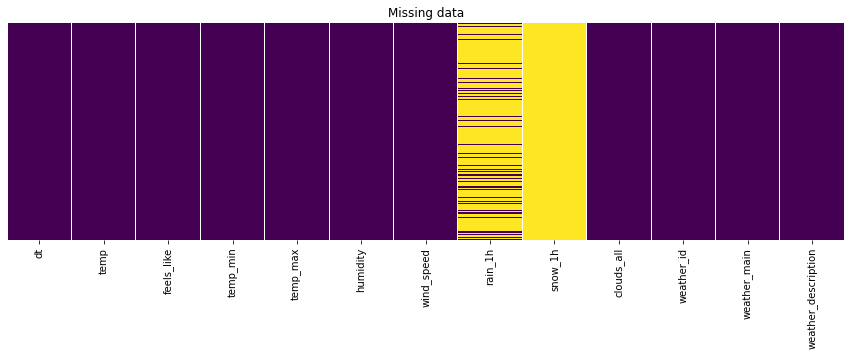

In [93]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [94]:
df.rain_1h.value_counts(dropna=False)

NaN      123166
0.25       1998
0.30       1087
0.11        914
0.13        734
          ...  
7.17          1
5.43          1
8.15          1
7.99          1
26.09         1
Name: rain_1h, Length: 979, dtype: int64

In [96]:
df.snow_1h.value_counts(dropna=False)

NaN     151091
0.30        14
0.25        12
0.50         9
4.00         8
         ...  
1.30         1
0.54         1
0.52         1
0.24         1
0.41         1
Name: snow_1h, Length: 62, dtype: int64

In [97]:
# change nan to zero
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)

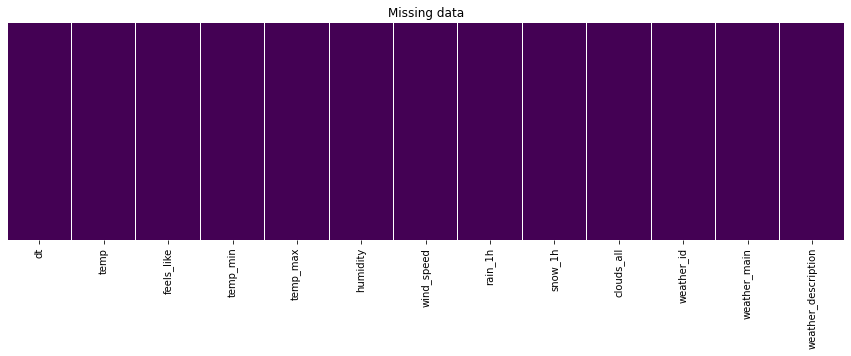

In [98]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

# convert to datetime


In [99]:
# convert to datetime
df.dt = pd.to_datetime(df['dt'], unit='s')

In [100]:
df.columns.to_list()

['dt',
 'temp',
 'feels_like',
 'temp_min',
 'temp_max',
 'humidity',
 'wind_speed',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_id',
 'weather_main',
 'weather_description']

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151265 entries, 0 to 151264
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt                   151265 non-null  datetime64[ns]
 1   temp                 151265 non-null  float64       
 2   feels_like           151265 non-null  float64       
 3   temp_min             151265 non-null  float64       
 4   temp_max             151265 non-null  float64       
 5   humidity             151265 non-null  int64         
 6   wind_speed           151265 non-null  float64       
 7   rain_1h              151265 non-null  float64       
 8   snow_1h              151265 non-null  float64       
 9   clouds_all           151265 non-null  int64         
 10  weather_id           151265 non-null  int64         
 11  weather_main         151265 non-null  object        
 12  weather_description  151265 non-null  object        
dtypes: datetime64[

In [102]:
df.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
0,2005-01-01 00:00:00,293.66,294.09,292.16,293.78,89,3.1,0.0,0.0,75,803,Clouds,broken clouds
1,2005-01-01 01:00:00,292.09,292.65,291.16,292.18,100,2.6,0.0,0.0,40,802,Clouds,scattered clouds
2,2005-01-01 02:00:00,292.14,292.71,290.18,292.18,100,3.6,0.0,0.0,90,741,Fog,fog
3,2005-01-01 03:00:00,291.34,291.83,291.16,291.58,100,3.1,0.0,0.0,90,741,Fog,fog
4,2005-01-01 04:00:00,291.07,291.53,290.16,291.58,100,3.1,0.0,0.0,90,741,Fog,fog


In [103]:
df.weather_description.value_counts(dropna=False)

sky is clear                    51183
broken clouds                   18666
overcast clouds                 17315
light rain                      17066
scattered clouds                13650
few clouds                      11584
mist                             9678
moderate rain                    4489
fog                              1841
haze                             1510
heavy intensity rain             1458
thunderstorm                      988
thunderstorm with light rain      500
thunderstorm with heavy rain      264
thunderstorm with rain            205
proximity thunderstorm            203
light intensity drizzle           151
very heavy rain                    98
shower rain                        94
smoke                              91
light snow                         70
drizzle                            66
snow                               44
light intensity shower rain        23
heavy intesity shower rain          8
squalls                             7
extreme rain

In [104]:
df.weather_main.value_counts()

Clouds          61215
Clear           51183
Rain            23242
Mist             9678
Thunderstorm     2160
Fog              1841
Haze             1510
Drizzle           222
Snow              116
Smoke              91
Squall              7
Name: weather_main, dtype: int64

## Convert temp
kelvin to cel

In [105]:
def Celsius_to_Kelvin(C):
    return (C + 273.15)

def Kelvin_to_Celsius(K):
    return (K - 273.15)


def Kelvin_to_Farh(K):
    return (K -273.15) * 9/5 + 32 


def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [106]:
df['temp'] = Kelvin_to_Farh(df["temp"])
df['temp_min'] = Kelvin_to_Farh(df["temp_min"])
df['feels_like'] = Kelvin_to_Farh(df["feels_like"])
df['temp_max'] = Kelvin_to_Farh(df["temp_max"])

In [107]:
df.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
0,2005-01-01 00:00:00,68.918,69.692,66.218,69.134,89,3.1,0.0,0.0,75,803,Clouds,broken clouds
1,2005-01-01 01:00:00,66.092,67.100,64.418,66.254,100,2.6,0.0,0.0,40,802,Clouds,scattered clouds
2,2005-01-01 02:00:00,66.182,67.208,62.654,66.254,100,3.6,0.0,0.0,90,741,Fog,fog
3,2005-01-01 03:00:00,64.742,65.624,64.418,65.174,100,3.1,0.0,0.0,90,741,Fog,fog
4,2005-01-01 04:00:00,64.256,65.084,62.618,65.174,100,3.1,0.0,0.0,90,741,Fog,fog


In [108]:
df['dt'].dt.year.value_counts()

2019    9523
2020    9423
2018    9374
2007    9180
2015    9174
2016    9118
2014    9114
2017    9111
2008    9101
2006    9094
2009    9092
2012    9083
2010    9056
2005    9029
2013    9015
2011    8912
2021    4866
Name: dt, dtype: int64

In [138]:
df_15 = df.loc[(df['dt'] >= '2015-01-01')
                     & (df['dt'] < '2015-12-30')].reset_index(drop=True)

df_15 = df_15.set_index(pd.DatetimeIndex(df_15['dt']))


In [139]:
df_15


,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
dt,,,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,45.464,39.488,44.294,46.994,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds
2015-01-01 01:00:00,2015-01-01 01:00:00,45.500,44.240,45.194,46.994,65,1.5,0.0,0.0,90,804,Clouds,overcast clouds
2015-01-01 02:00:00,2015-01-01 02:00:00,45.230,40.010,44.294,46.994,62,4.6,0.0,0.0,90,804,Clouds,overcast clouds
2015-01-01 03:00:00,2015-01-01 03:00:00,45.194,38.804,44.294,46.094,62,6.2,0.0,0.0,90,804,Clouds,overcast clouds
2015-01-01 04:00:00,2015-01-01 04:00:00,45.212,39.164,44.294,46.094,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29 19:00:00,2015-12-29 19:00:00,50.774,48.470,50.018,52.034,62,2.1,0.0,0.0,90,804,Clouds,overcast clouds
2015-12-29 20:00:00,2015-12-29 20:00:00,50.810,48.560,50.018,52.034,63,2.1,0.0,0.0,90,804,Clouds,overcast clouds
2015-12-29 21:00:00,2015-12-29 21:00:00,52.142,50.018,51.134,53.114,63,5.1,0.0,0.0,90,804,Clouds,overcast clouds


In [140]:
df_15['month'] = df_15['dt'].dt.month

<AxesSubplot:xlabel='dt'>

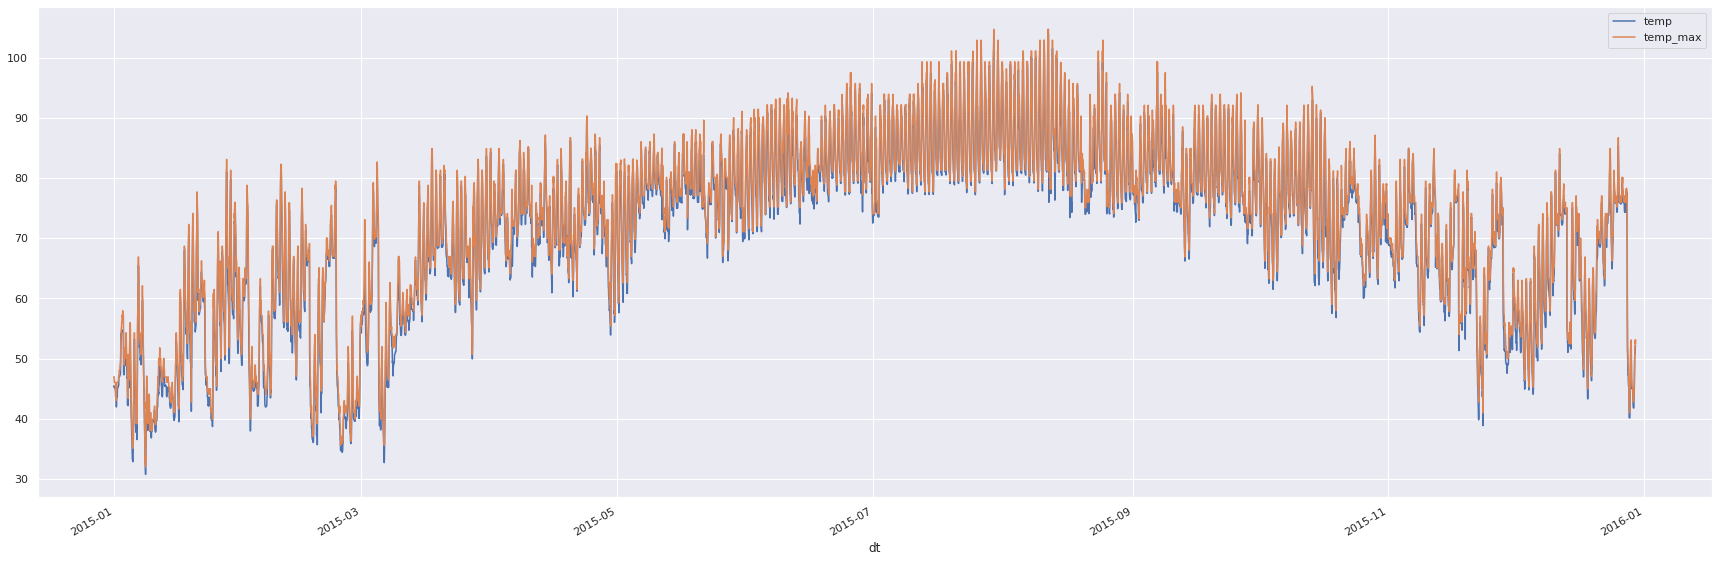

In [155]:
#df_15[['temp_min',"temp", "temp_max",'wind_speed']].plot(figsize=(30,10))
df_15[["temp",'temp_max']].plot(figsize=(30,10))

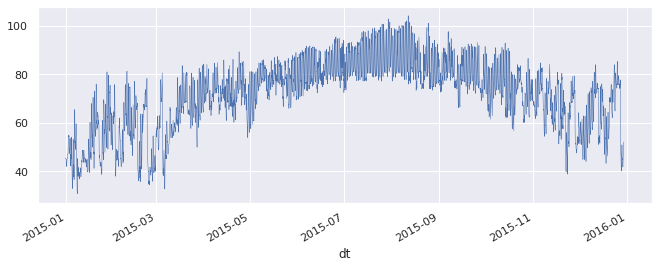

In [156]:
df_15['temp'].plot(linewidth=0.5);

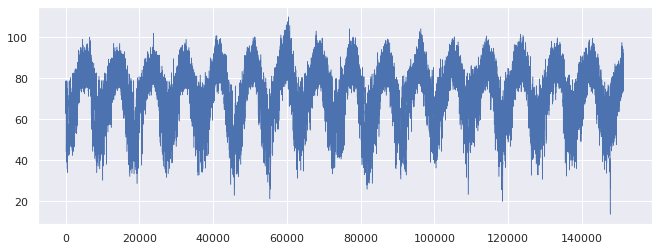

In [157]:
df['temp'].plot(linewidth=0.5);

In [86]:
df['dt'].dt.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [87]:
df['dt'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

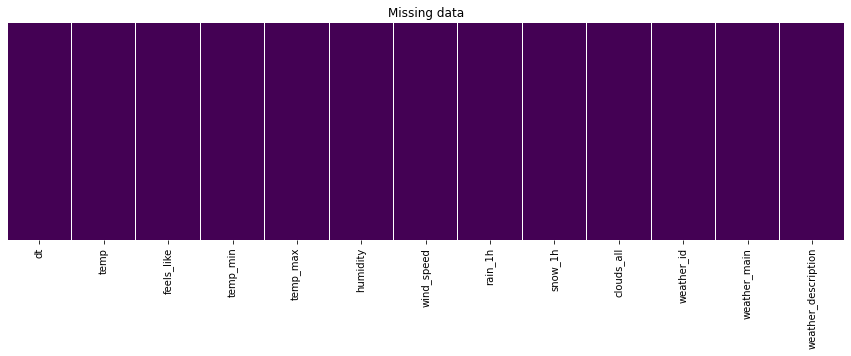

In [88]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [158]:
df_21 = df.loc[(df['dt'] >= '2021-01-01')
                     & (df['dt'] < '2021-06-30')].reset_index(drop=True)

df_21 = df_21.set_index(pd.DatetimeIndex(df_21['dt']))


In [159]:
df_21


,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
dt,,,,,,,,,,,,,
2021-01-01 00:00:00,2021-01-01 00:00:00,47.912,44.204,47.102,50.018,90,3.60,0.00,0.0,90,804,Clouds,overcast clouds
2021-01-01 01:00:00,2021-01-01 01:00:00,46.940,44.618,45.140,48.254,90,2.24,0.25,0.0,90,500,Rain,light rain
2021-01-01 02:00:00,2021-01-01 02:00:00,47.012,46.292,45.212,48.254,85,1.34,0.00,0.0,90,804,Clouds,overcast clouds
2021-01-01 03:00:00,2021-01-01 03:00:00,46.400,46.400,44.978,47.174,81,0.45,0.00,0.0,90,804,Clouds,overcast clouds
2021-01-01 04:00:00,2021-01-01 04:00:00,46.976,43.088,44.924,48.254,80,3.58,0.00,0.0,90,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29 19:00:00,2021-06-29 19:00:00,80.150,84.992,78.800,82.886,83,3.09,1.00,0.0,90,500,Rain,light rain
2021-06-29 20:00:00,2021-06-29 20:00:00,78.080,79.538,77.054,81.068,84,0.00,0.51,0.0,20,500,Rain,light rain
2021-06-29 21:00:00,2021-06-29 21:00:00,79.412,79.412,78.854,82.418,87,0.00,0.25,0.0,1,500,Rain,light rain


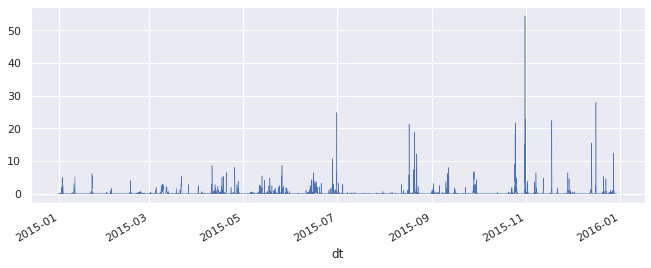

In [177]:
df_15['rain_1h'].plot(linewidth=0.5);

In [165]:
df.temp_max.max()

111.90200000000007

In [164]:
df[df.temp == 110.04800000000003]

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
60381,2011-08-27 21:00:00,110.048,114.872,102.074,111.902,23,0.0,0.0,0.0,20,801,Clouds,few clouds


In [167]:
df.temp_min.min()

12.254000000000055

In [168]:
df[df.temp_min == 12.254000000000055
]

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
147629,2021-02-16 12:00:00,13.784,13.784,12.254,16.142,69,0.89,0.0,0.0,75,803,Clouds,broken clouds
147630,2021-02-16 13:00:00,13.586,13.586,12.254,16.034,69,0.45,0.0,0.0,40,802,Clouds,scattered clouds


In [170]:
df.snow_1h.max()

5.3

In [171]:
df.snow_1h.value_counts()

0.00    151091
0.30        14
0.25        12
0.50         9
4.00         8
         ...  
1.30         1
0.54         1
0.52         1
0.24         1
0.41         1
Name: snow_1h, Length: 62, dtype: int64

In [172]:
df[df.snow_1h == 5.3
]

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
83141,2014-03-04 12:00:00,33.062,26.816,32.702,34.034,93,3.1,0.0,5.3,90,602,Snow,heavy snow
83142,2014-03-04 12:00:00,33.062,26.816,32.702,34.034,93,3.1,0.0,5.3,90,501,Rain,moderate rain
83143,2014-03-04 12:00:00,33.062,26.816,32.702,34.034,93,3.1,0.0,5.3,90,701,Mist,mist


In [173]:
df.weather_description.value_counts()

sky is clear                    51183
broken clouds                   18666
overcast clouds                 17315
light rain                      17066
scattered clouds                13650
few clouds                      11584
mist                             9678
moderate rain                    4489
fog                              1841
haze                             1510
heavy intensity rain             1458
thunderstorm                      988
thunderstorm with light rain      500
thunderstorm with heavy rain      264
thunderstorm with rain            205
proximity thunderstorm            203
light intensity drizzle           151
very heavy rain                    98
shower rain                        94
smoke                              91
light snow                         70
drizzle                            66
snow                               44
light intensity shower rain        23
heavy intesity shower rain          8
squalls                             7
extreme rain

In [188]:
df_15 = df.loc[(df['dt'] >= '2015-01-01')
                     & (df['dt'] < '2015-12-30')].reset_index(drop=True)
df_15['month'] = df_15['dt'].dt.month
df_15 = df_15.set_index(df_15['month'])


In [189]:
df_15

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,month
month,,,,,,,,,,,,,,
1,2015-01-01 00:00:00,45.464,39.488,44.294,46.994,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds,1
1,2015-01-01 01:00:00,45.500,44.240,45.194,46.994,65,1.5,0.0,0.0,90,804,Clouds,overcast clouds,1
1,2015-01-01 02:00:00,45.230,40.010,44.294,46.994,62,4.6,0.0,0.0,90,804,Clouds,overcast clouds,1
1,2015-01-01 03:00:00,45.194,38.804,44.294,46.094,62,6.2,0.0,0.0,90,804,Clouds,overcast clouds,1
1,2015-01-01 04:00:00,45.212,39.164,44.294,46.094,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2015-12-29 19:00:00,50.774,48.470,50.018,52.034,62,2.1,0.0,0.0,90,804,Clouds,overcast clouds,12
12,2015-12-29 20:00:00,50.810,48.560,50.018,52.034,63,2.1,0.0,0.0,90,804,Clouds,overcast clouds,12
12,2015-12-29 21:00:00,52.142,50.018,51.134,53.114,63,5.1,0.0,0.0,90,804,Clouds,overcast clouds,12


In [179]:
df_15

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,month
dt,,,,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,45.464,39.488,44.294,46.994,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds,1
2015-01-01 01:00:00,2015-01-01 01:00:00,45.500,44.240,45.194,46.994,65,1.5,0.0,0.0,90,804,Clouds,overcast clouds,1
2015-01-01 02:00:00,2015-01-01 02:00:00,45.230,40.010,44.294,46.994,62,4.6,0.0,0.0,90,804,Clouds,overcast clouds,1
2015-01-01 03:00:00,2015-01-01 03:00:00,45.194,38.804,44.294,46.094,62,6.2,0.0,0.0,90,804,Clouds,overcast clouds,1
2015-01-01 04:00:00,2015-01-01 04:00:00,45.212,39.164,44.294,46.094,62,5.7,0.0,0.0,90,804,Clouds,overcast clouds,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29 19:00:00,2015-12-29 19:00:00,50.774,48.470,50.018,52.034,62,2.1,0.0,0.0,90,804,Clouds,overcast clouds,12
2015-12-29 20:00:00,2015-12-29 20:00:00,50.810,48.560,50.018,52.034,63,2.1,0.0,0.0,90,804,Clouds,overcast clouds,12
2015-12-29 21:00:00,2015-12-29 21:00:00,52.142,50.018,51.134,53.114,63,5.1,0.0,0.0,90,804,Clouds,overcast clouds,12


<AxesSubplot:xlabel='month'>

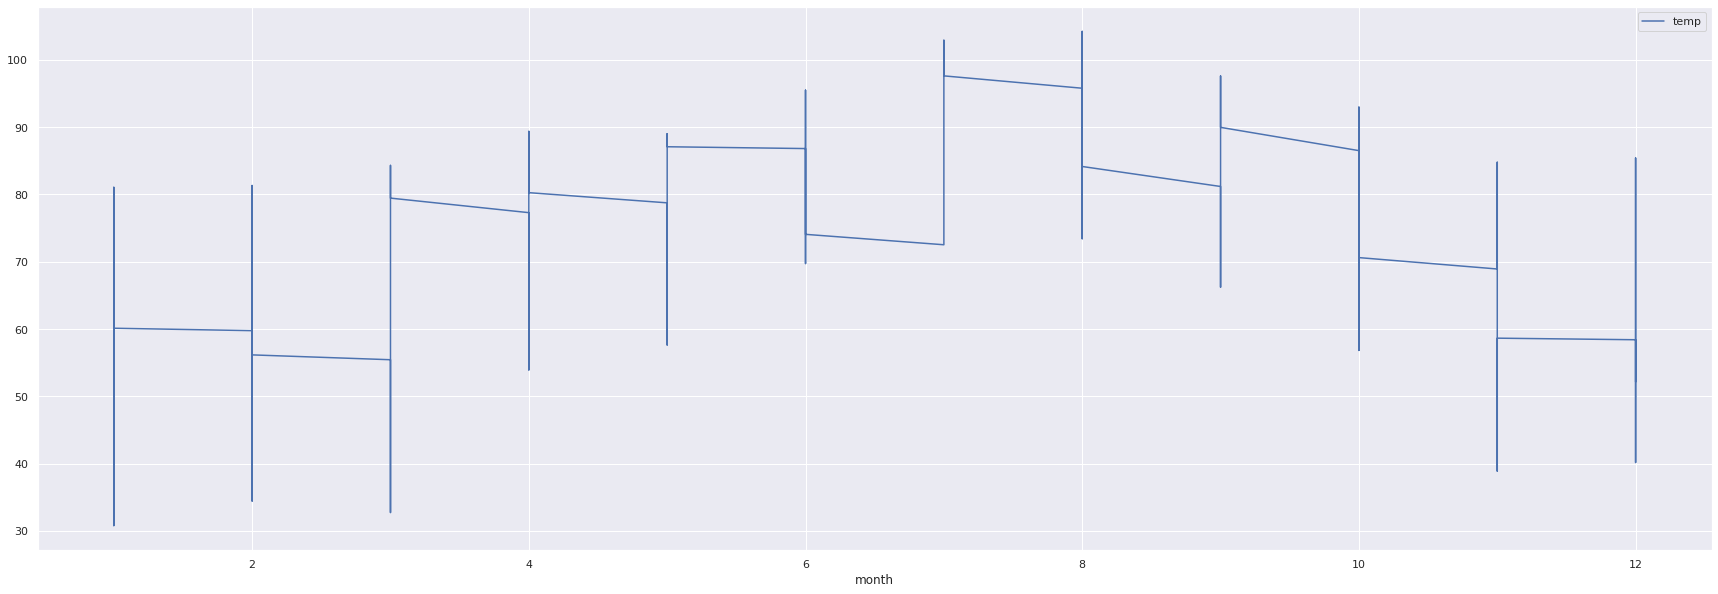

In [192]:
df_15[["temp"]].plot(figsize=(30,10))